# Logistic Regression - Heart Disease Prediction

## Introduction

The World Health Organization estimates that approximately **12 million deaths** occur worldwide each year due to heart diseases. In fact, half of the deaths in the United States and other developed countries are attributed to cardiovascular diseases. Early prognosis of cardiovascular diseases can significantly aid in making informed decisions regarding lifestyle changes for high-risk patients, ultimately reducing complications and improving health outcomes.

This research aims to identify the most relevant risk factors associated with heart disease and to predict the overall risk using **logistic regression**. By leveraging statistical methods, we can enhance the understanding of how various factors contribute to the likelihood of developing heart disease, facilitating timely interventions.

**Please note that this project is conducted as part of my studies, and the findings presented herein should be verified and interpreted with caution.**

### Source

The dataset used for this analysis is publicly available on the **Kaggle** platform and originates from an ongoing cardiovascular study conducted on residents of **Framingham, Massachusetts**. The classification goal of this study is to predict whether a patient has a **10-year risk** of future coronary heart disease (CHD).

The dataset comprises over **4,000 records** and includes **15 attributes** detailing various patient information. This wealth of data will enable a comprehensive analysis of the risk factors associated with heart disease and support the development of a predictive model.


## Project Column Overview

### Demographic
- **Sex**: The patient's sex, with possible values of "male" or "female" (Nominal).
- **Age**: Age of the patient, measured in years. Although recorded as whole numbers, the concept of age is continuous (Continuous).

### Behavioral
- **Current Smoker**: Indicates whether the patient is a current smoker, with values of "Yes" or "No" (Nominal).
- **Cigs Per Day**: The average number of cigarettes smoked per day by the patient. It can be considered continuous, as it is possible to smoke a fraction of a cigarette (Continuous).

### Medical (History)
- **BP Meds**: Indicates whether the patient was on blood pressure medication (Nominal).
- **Prevalent Stroke**: Indicates whether the patient had previously experienced a stroke (Nominal).
- **Prevalent Hyp**: Indicates whether the patient was hypertensive (Nominal).
- **Diabetes**: Indicates whether the patient had diabetes (Nominal).

### Medical (Current)
- **Tot Chol**: Total cholesterol level measured in the blood (Continuous).
- **Sys BP**: Systolic blood pressure, the pressure in blood vessels during heartbeats (Continuous).
- **Dia BP**: Diastolic blood pressure, the pressure in blood vessels when the heart is resting between beats (Continuous).
- **BMI**: Body Mass Index, a measure of body fat based on weight and height (Continuous).
- **Heart Rate**: The number of heartbeats per minute. Although typically considered discrete, it is treated as continuous due to the large number of possible values (Continuous).
- **Glucose**: Glucose level in the blood (Continuous).

### Target Variable (Desired Prediction)
- **10-Year Risk of Coronary Heart Disease (CHD)**: Indicates the risk of developing coronary heart disease within ten years following the assessment. The values are binary: "1" means "Yes," and "0" means "No."

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
# Load data 
df= pd.read_csv("Dataset/framingham.csv")

## Preliminary Data Exploration

In [23]:
# Display first five rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
# Display basic statistics of the DataFrame
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [25]:
# Display the total number of missing values in each column
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [26]:
# Display the number of rows and columns in the DataFrame
shape_df = df.shape

In [27]:
shape_df

(4238, 16)

In [28]:
# Display the data types of each column in the DataFrame
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

## Data Cleaning

### Manage missing values

In [29]:
row_sum = shape_df[0]
five_percent = int(row_sum * 0.05)

In [30]:
print(f"The rule is that if there are less than 5% of missing values in a column, we can delete those rows. Thus, we can delete all the rows in columns with less than {five_percent} of missing values.")


The rule is that if there are less than 5% of missing values in a column, we can delete those rows. Thus, we can delete all the rows in columns with less than 211 of missing values.


We can delete rows in the following columns due to the presence of missing values:

- **education**: 105 missing values
- **cigsPerDay**: 29 missing values
- **BPMeds**: 53 missing values
- **totChol**: 50 missing values
- **BMI**: 19 missing values
- **heartRate**: 1 missing value

In [31]:
df_clean = df.dropna(subset=["education","cigsPerDay","BPMeds","totChol","BMI","heartRate"])

In [32]:
df_clean.isna().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            331
TenYearCHD           0
dtype: int64

In this project, I will handle missing values in certain columns by imputing the mean when the percentage of missing data is low, to minimize the impact on the data distribution and maintain statistical integrity.

In [33]:
# Calculate the means of the gulcose columns 
mean_glucose = df_clean["glucose"].mean()
mean_glucose

81.85612691466083

In [34]:
# Replace the missing values in 'glucose' with the mean.
df_clean["glucose"]  = df_clean["glucose"].fillna(mean_glucose)

/var/folders/lz/zsz00k2n3pbflxxlfqttyt500000gn/T/ipykernel_2472/3573398408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["glucose"]  = df_clean["glucose"].fillna(mean_glucose)


In [35]:
df_clean.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Normalizing data

I am normalizing the data before applying logistic regression to ensure that all features are on a similar scale, which will improve model convergence, enhance the interpretability of the coefficients, and increase numerical stability during optimization.

Before choosing between standardization (Z-score) and min-max normalization, it is important to carefully analyze your dataset to identify the potential presence of outliers, in order to select the most appropriate normalization method and thus obtain more reliable results for subsequent analyses.

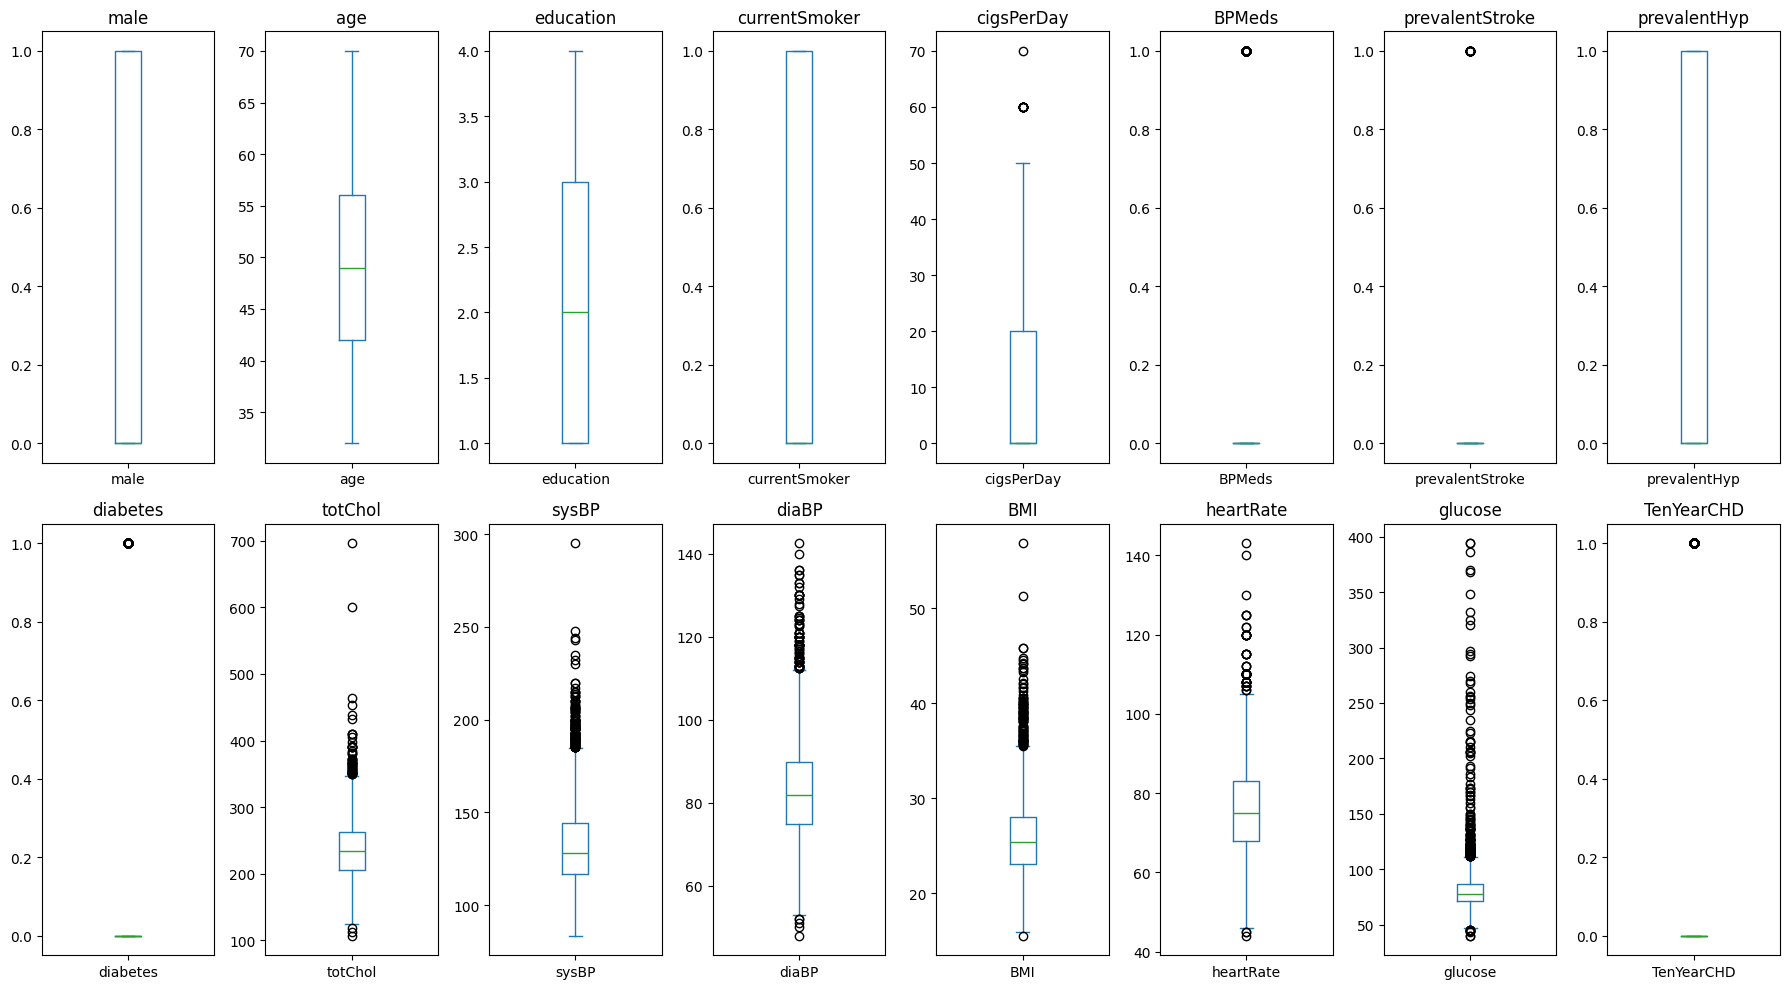

In [36]:
#Display outliers

num_cols = len(df_clean.columns)
num_rows = 2
num_cols_per_row = 8

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(18, 10))

for i, col in enumerate(df.columns):
    row = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    df[col].plot(kind='box', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()


We can observe several outlier values in the data, so it would be preferable to use min-max normalization to normalize the data. This method is less sensitive to extreme values compared to standard score (Z-score) normalization.

### min-max normalization

In [37]:
#Identify the target columns
target_column = 'TenYearCHD'

# Create a copy of the DataFrame
df_clean_copy = df_clean.copy()

# Min-max normalization on the feature columns
for column in df_clean_copy.columns:
    if column != target_column:
        df_clean_copy[f"{column}_normalized"] = (df_clean_copy[column] - df_clean_copy[column].min()) / (df_clean_copy[column].max() - df_clean_copy[column].min())

# Create a new DataFrame with the normalized columns and the target column
X = df_clean_copy[[col for col in df_clean_copy.columns if '_normalized' in col]]
y = df_clean_copy[target_column]

In [38]:
X.columns

Index(['male_normalized', 'age_normalized', 'education_normalized',
       'currentSmoker_normalized', 'cigsPerDay_normalized',
       'BPMeds_normalized', 'prevalentStroke_normalized',
       'prevalentHyp_normalized', 'diabetes_normalized', 'totChol_normalized',
       'sysBP_normalized', 'diaBP_normalized', 'BMI_normalized',
       'heartRate_normalized', 'glucose_normalized'],
      dtype='object')

In [39]:
X

,male_normalized,age_normalized,education_normalized,currentSmoker_normalized,cigsPerDay_normalized,BPMeds_normalized,prevalentStroke_normalized,prevalentHyp_normalized,diabetes_normalized,totChol_normalized,sysBP_normalized,diaBP_normalized,BMI_normalized,heartRate_normalized,glucose_normalized
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1.0,0.947368,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.129363,0.399527,0.518519,0.184198,0.161616,0.110169
4233,1.0,0.473684,0.000000,1.0,0.014286,0.0,0.0,1.0,0.0,0.410678,0.451537,0.465608,0.252787,0.222222,0.129944
4234,1.0,0.500000,0.666667,1.0,0.614286,0.0,0.0,0.0,0.0,0.193018,0.203310,0.338624,0.101066,0.212121,0.079096
4236,0.0,0.315789,0.000000,1.0,0.214286,0.0,0.0,0.0,0.0,0.199179,0.203310,0.412698,0.087736,0.424242,0.118238


In [40]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4232    1
4233    1
4234    0
4236    0
4237    0
Name: TenYearCHD, Length: 3987, dtype: int64

## Analysis of Relationships Between Variables

In [43]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

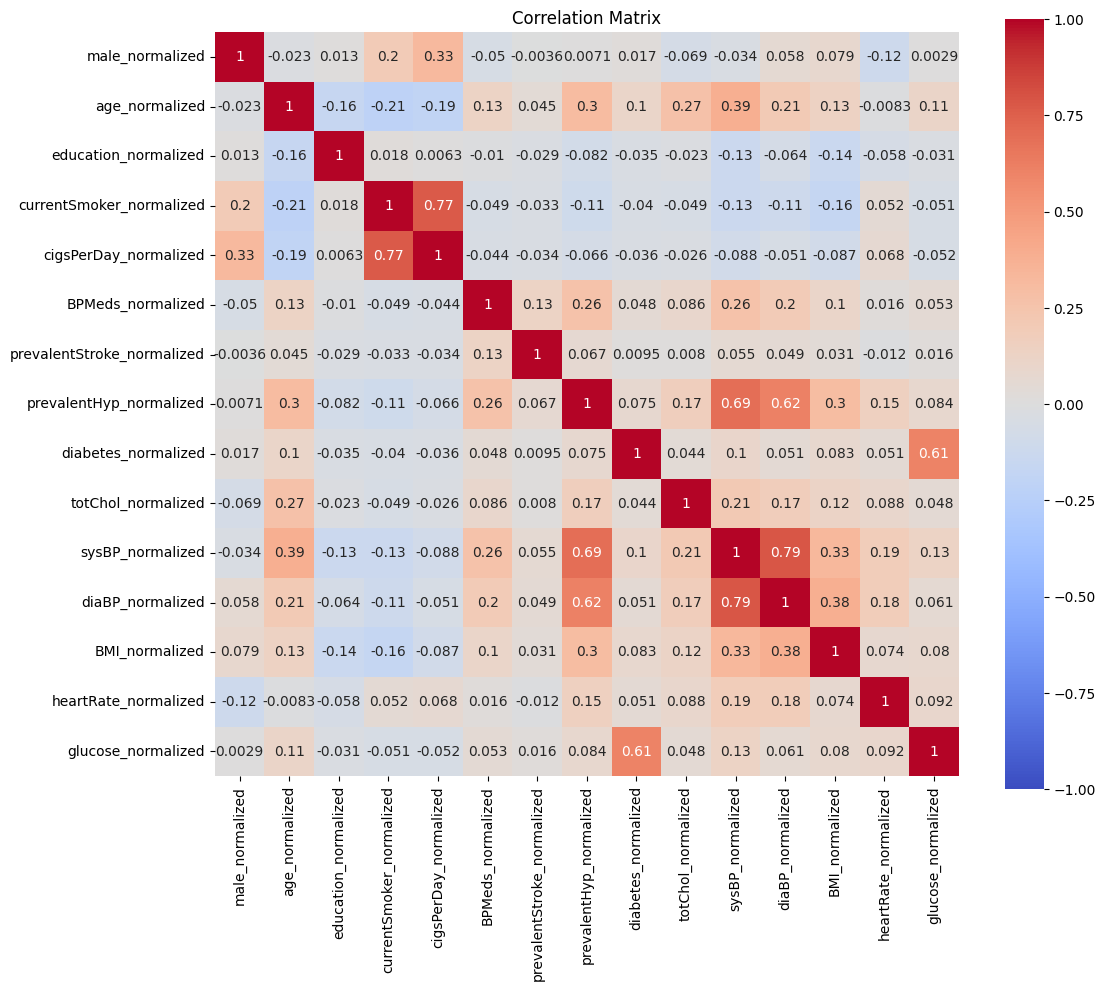

In [44]:
# Display the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix')
plt.show()

In [45]:
correlation_matrix

,male_normalized,age_normalized,education_normalized,currentSmoker_normalized,cigsPerDay_normalized,BPMeds_normalized,prevalentStroke_normalized,prevalentHyp_normalized,diabetes_normalized,totChol_normalized,sysBP_normalized,diaBP_normalized,BMI_normalized,heartRate_normalized,glucose_normalized
male_normalized,1.000000,-0.022661,0.012988,0.201365,0.326439,-0.050024,-0.003618,0.007099,0.016915,-0.068606,-0.033550,0.058443,0.078999,-0.115639,0.002927
age_normalized,-0.022661,1.000000,-0.160599,-0.213758,-0.190422,0.128390,0.045036,0.304913,0.104718,0.269356,0.390079,0.206722,0.134364,-0.008313,0.113621
education_normalized,0.012988,-0.160599,1.000000,0.018366,0.006260,-0.010029,-0.028540,-0.081717,-0.034684,-0.022649,-0.128381,-0.063712,-0.136001,-0.058138,-0.030581
currentSmoker_normalized,0.201365,-0.213758,0.018366,1.000000,0.770785,-0.048925,-0.032537,-0.105285,-0.040233,-0.048969,-0.130845,-0.109655,-0.164752,0.051932,-0.051080
cigsPerDay_normalized,0.326439,-0.190422,0.006260,0.770785,1.000000,-0.043958,-0.033948,-0.066404,-0.036184,-0.026239,-0.087924,-0.051174,-0.087372,0.067597,-0.051539
BPMeds_normalized,-0.050024,0.128390,-0.010029,-0.048925,-0.043958,1.000000,0.127479,0.259707,0.047630,0.086113,0.260429,0.196103,0.102983,0.016325,0.052774
prevalentStroke_normalized,-0.003618,0.045036,-0.028540,-0.032537,-0.033948,0.127479,1.000000,0.067315,0.009539,0.007950,0.055170,0.049318,0.031380,-0.012109,0.015680
prevalentHyp_normalized,0.007099,0.304913,-0.081717,-0.105285,-0.066404,0.259707,0.067315,1.000000,0.075064,0.165329,0.693985,0.615394,0.304445,0.151672,0.083585
diabetes_normalized,0.016915,0.104718,-0.034684,-0.040233,-0.036184,0.047630,0.009539,0.075064,1.000000,0.044473,0.101061,0.051326,0.082742,0.051474,0.608154
totChol_normalized,-0.068606,0.269356,-0.022649,-0.048969,-0.026239,0.086113,0.007950,0.165329,0.044473,1.000000,0.214726,0.172057,0.122963,0.088371,0.047721


Based on the correlation matrix, here are two key insights:

- Strong relationship between blood pressure variables: There is a high correlation (0.79) between systolic blood pressure (sysBP_normalized) and diastolic blood pressure   (diaBP_normalized), indicating a close link between these two measures.

- Smoking behavior: currentSmoker_normalized and cigsPerDay_normalized have a strong correlation (0.77), suggesting that smokers tend to smoke more cigarettes per day, which aligns with expectations.

These findings highlight significant relationships in the data, particularly around blood pressure and smoking behavior.

### Logistic Regression

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [57]:
# Split data into test and train 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [54]:
#Train Model on Test Data

In [58]:
model = LogisticRegression()

In [59]:
model.fit(X_train , y_train)

LogisticRegression()

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [62]:
# Evaluate model with test data
score = model.score(X_test, y_test)
print("Accuracy on test data:", score)

Accuracy on test data: 0.8345864661654135


In [63]:
y_pred = model.predict(X_test)

# Calcul des métriques
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.75
Recall: 0.04
F1-score: 0.08

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       662
           1       0.75      0.04      0.08       136

    accuracy                           0.83       798
   macro avg       0.79      0.52      0.50       798
weighted avg       0.82      0.83      0.77       798



The main issue with the model is the **class imbalance** between the majority class (0) and the minority class (1). Despite achieving an overall **accuracy of 83%**, the model performs poorly on the minority class, as evidenced by a **low recall (0.04)** and **F1-score (0.08)**. This indicates that the model fails to correctly predict the minority class, which is a common challenge when dealing with imbalanced datasets.
